In [2]:
# Select start and end date
start_date = '2023-07-14 10:00:00'

# # big round test
# start_date = '2023-07-14 10:22:00'
# end_date = '2023-07-14 10:27:00'

# # going up test
# start_date = '2023-07-14 10:28:00'
# end_date = '2023-07-14 10:34:00'

# # big 8 test
# start_date = '2023-07-14 10:38:00'
# end_date = '2023-07-14 10:43:00'

# # small round test
# start_date = '2023-07-14 10:49:00'
# end_date = '2023-07-14 10:56:00'

# small 8 test
# start_date = '2023-07-14 10:56:00'
# end_date = '2023-07-14 11:01:00'

end_date = '2023-07-14 11:30:00'

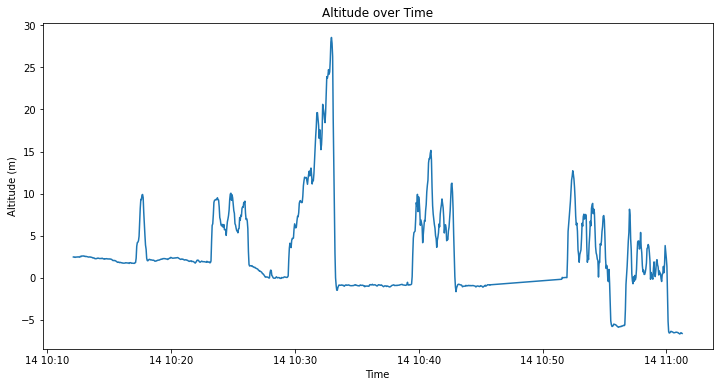

/var/folders/4x/r862jfdj31g0f_d96v7w91f80000gp/T/ipykernel_34931/3010728242.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_gps['lat'] = data_gps['lat'] / 1e7
/var/folders/4x/r862jfdj31g0f_d96v7w91f80000gp/T/ipykernel_34931/3010728242.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_gps['lon'] = data_gps['lon'] / 1e7


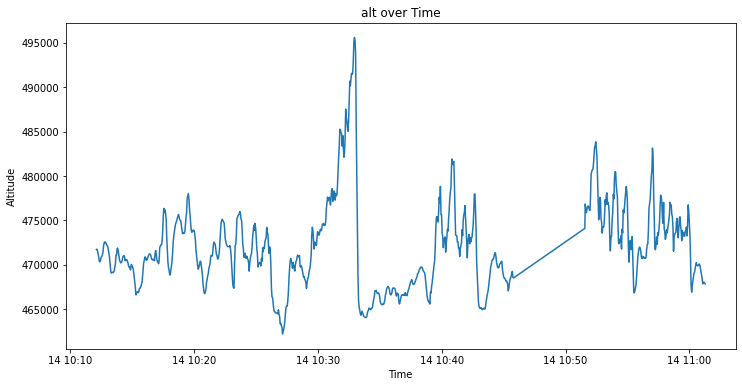

In [3]:
# visualize altitude, and gps location on map

import pandas as pd
import folium
import plotly.graph_objects as go
import matplotlib.pyplot as plt


# Load the CSV data into a DataFrame
data = pd.read_csv('data_0714/pixhawk_gps_1689322326086276514.csv', skipinitialspace=True)

# Convert received_time to datetime format
data['received_time'] = pd.to_datetime(data['received_time'], unit='ns')

# Localize the timestamp to GMT first (assuming the original time is in GMT)
data['received_time'] = data['received_time'].dt.tz_localize('GMT')

# Convert to Rome time
data['received_time'] = data['received_time'].dt.tz_convert('Europe/Rome')

# Filter data based on the date range
mask = (data['received_time'] > start_date) & (data['received_time'] <= end_date)
data = data.loc[mask]


data_altitude = data.dropna(subset=['altitude'])

# Plot altitude over time
plt.figure(figsize=(12, 6))
plt.plot(data_altitude['received_time'], data_altitude['altitude'])
plt.xlabel('Time')
plt.ylabel('Altitude (m)')
plt.title('Altitude over Time')
plt.show()

data_gps = data.dropna(subset=['lat', 'lon'])

# Divide by a large number to get latitude and longitude values in the correct range
data_gps['lat'] = data_gps['lat'] / 1e7
data_gps['lon'] = data_gps['lon'] / 1e7

# Plot altitude over time
plt.figure(figsize=(12, 6))
plt.plot(data_gps['received_time'], data_gps['alt'])
plt.xlabel('Time')
plt.ylabel('Altitude')
plt.title('alt over Time')
plt.show()

# Create a scatter mapbox
fig = go.Figure(go.Scattermapbox(
    mode="lines+markers",
    lon=data_gps['lon'],
    lat=data_gps['lat'],
    marker={'size': 5}))

# Set mapbox style and zoom level
fig.update_layout(
    autosize=False, # This line needs to be added
    width=1000, # Adjust as necessary
    height=800, # Adjust as necessary
    mapbox_style="open-street-map",
    mapbox={
        'center': {'lon': data_gps['lon'].mean(), 'lat': data_gps['lat'].mean()},
        'zoom': 18})

fig.show()
